In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [2]:
print("Taille du dataset d'entraînement :", x_train.shape)
print("Taille du dataset de test :", x_test.shape)
print("Nombre d'images d'entraînement :", len(x_train))
print("Nombre d'images de test :", len(x_test))
num_classes = len(set(y_train.flatten()))
print("Nombre de classes :", num_classes)

Taille du dataset d'entraînement : (50000, 32, 32, 3)
Taille du dataset de test : (10000, 32, 32, 3)
Nombre d'images d'entraînement : 50000
Nombre d'images de test : 10000
Nombre de classes : 10


In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding des étiquettes
num_classes = 10  
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='relu'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 6.1352 - accuracy: 0.1941 - val_loss: 6.1323 - val_accuracy: 0.2060
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 6.1099 - accuracy: 0.2106 - val_loss: 6.1308 - val_accuracy: 0

In [5]:

model_cnn = models.Sequential()
# version clean of cnn with batch norm and dropout
# first convolution layer (batch norm ==> conv 3x3 ==> max pool 2x2)
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(layers.Dropout(0.05))
model_cnn.add(layers.MaxPooling2D((2, 2)))


model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.Dropout(0.05))
model_cnn.add(layers.MaxPooling2D((2, 2)))

model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Dropout(0.1))
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# fit and train model_cnn here 
# Saves the best epoch given by Hugo
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model_epoch.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model_cnn.fit(x_train, y_train,batch_size=16, epochs=13, validation_data=(x_test, y_test),callbacks=callbacks_list)


model.save('model.keras')
model_cnn.save('model_cnn.keras')



Epoch 1/13
3119/3125 [============================>.] - ETA: 0s - loss: 1.4607 - accuracy: 0.4796
Epoch 1: val_accuracy improved from -inf to 0.58800, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 24s 7ms/step - loss: 1.4603 - accuracy: 0.4797 - val_loss: 1.1550 - val_accuracy: 0.5880
Epoch 2/13
  20/3125 [..............................] - ETA: 25s - loss: 1.2835 - accuracy: 0.5625

/Users/yuss/Documents/cours_m2/machineLearning/tp4/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3122/3125 [============================>.] - ETA: 0s - loss: 1.1628 - accuracy: 0.5920
Epoch 2: val_accuracy improved from 0.58800 to 0.66810, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 26s 8ms/step - loss: 1.1626 - accuracy: 0.5921 - val_loss: 0.9512 - val_accuracy: 0.6681
Epoch 3/13
3120/3125 [============================>.] - ETA: 0s - loss: 1.0578 - accuracy: 0.6306
Epoch 3: val_accuracy improved from 0.66810 to 0.69640, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 45s 14ms/step - loss: 1.0577 - accuracy: 0.6307 - val_loss: 0.8746 - val_accuracy: 0.6964
Epoch 4/13
3124/3125 [============================>.] - ETA: 0s - loss: 0.9942 - accuracy: 0.6546
Epoch 4: val_accuracy improved from 0.69640 to 0.70330, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 28s 9ms/step - loss: 0.9943 - accuracy: 0.6546 - val_loss: 0.8584 - val_accuracy: 0.7033
Epoch 5/13
3122/3125 [==========

1/1 [==============================] - 0s 11ms/step


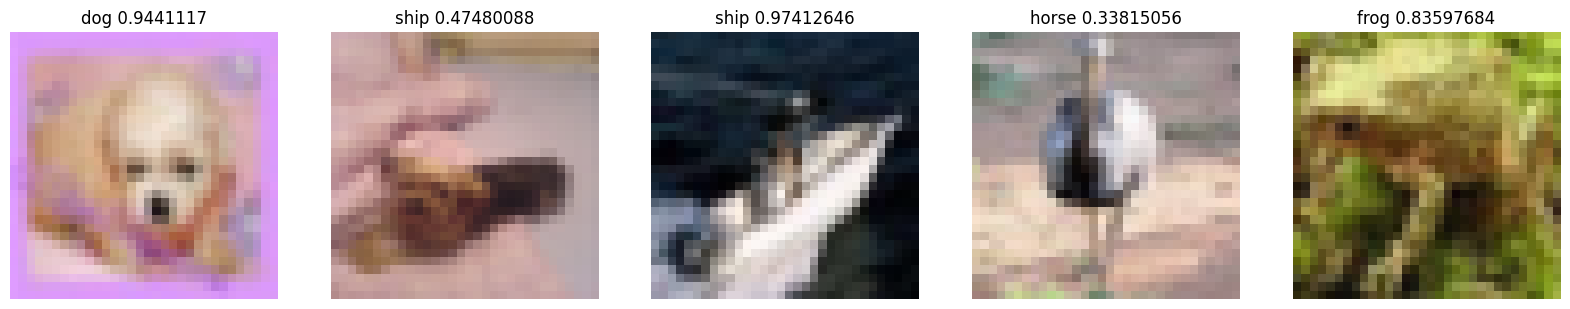

In [12]:
import matplotlib.pyplot as plt
import random

images = x_test[random.sample(range(0, len(x_test)), 5)]
# predict the class of each image
predictions = model_cnn.predict(images)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# show the images
fig = plt.figure(figsize=(20, 20))
for i in range(len(images)):
    fig.add_subplot(1, 5, (i+1)*1)
    plt.imshow(images[i])
    plt.axis('off')
    best = max(predictions[i])
    class_name = classes[list(predictions[i]).index(best)]
    plt.title(class_name+ " "+ str(best))